In [ ]:
import sklearn
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import NMF
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import random

data = sio.loadmat("data/olivettifaces")
faces=np.array(data["faces"])
faces.shape

(4096, 400)

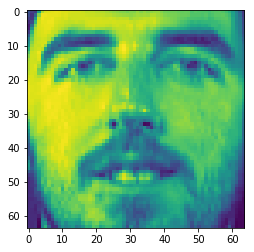

In [19]:
imgplot = plt.imshow(faces[:,100].reshape((64,64), order='F'))
plt.show()

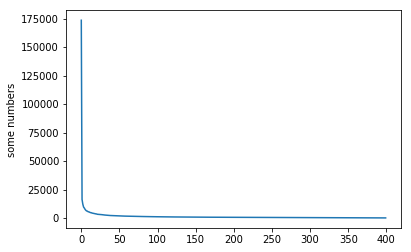

In [ ]:
u, s, vh = np.linalg.svd(faces, full_matrices=False)
plt.plot(s)
plt.ylabel('ith Largest Singular Value')
plt.xlabel('i')
plt.show()

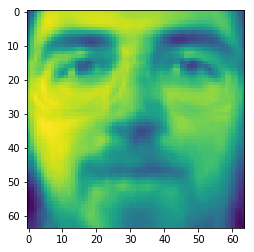

In [68]:
rank=20;
facesLowRank=u[:, 0:rank].dot(np.diag(s[0:rank]).dot(vh[0:rank, :]))
imgplot = plt.imshow(facesLowRank[:,100].reshape((64,64), order='F'))
plt.show()

In [91]:
Xtrain=[]
Xtest=[]
ytest=[]
ytrain=[]
for person in range(0,40):
    arr=np.arange(10)
    np.random.shuffle(arr)
    for j in range(0,5):
        Xtrain.append(faces[:, person*10+arr[j]])
        ytrain.append(person)
    for j in range(5,10):
        Xtest.append(faces[:, person*10+arr[j]])
        ytest.append(person)
Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

In [70]:
model = NMF(n_components=rank, init='random', random_state=0)
Wtrain = model.fit_transform(Xtrain)
Wtest=model.transform(Xtest)
H = model.components_

In [71]:
print(Wtrain.shape)

(200, 20)


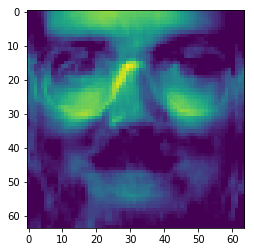

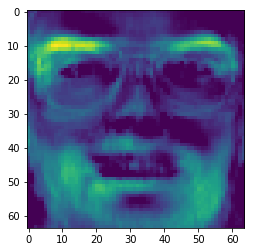

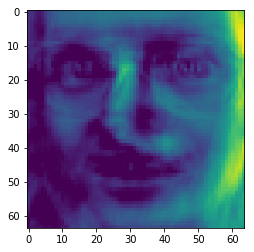

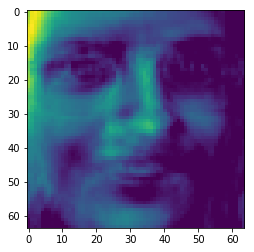

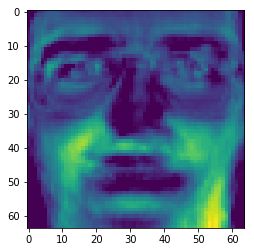

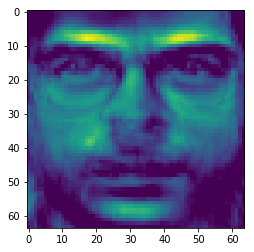

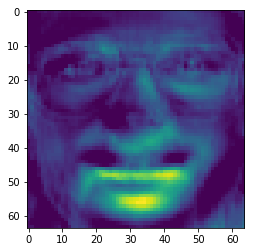

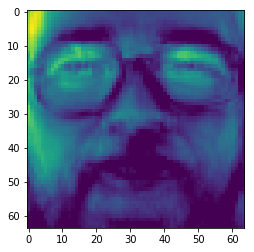

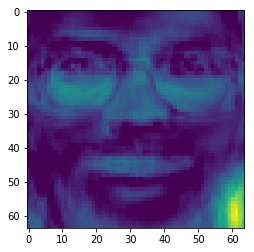

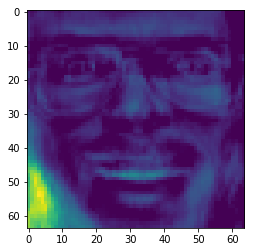

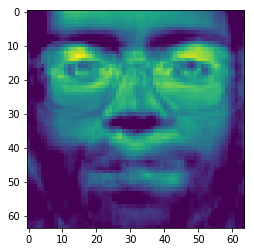

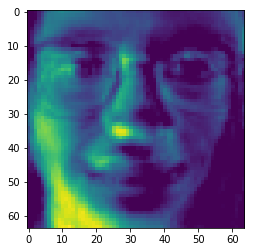

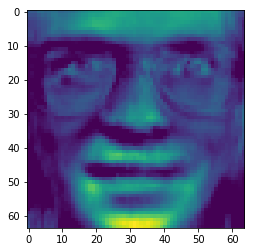

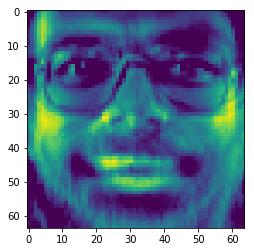

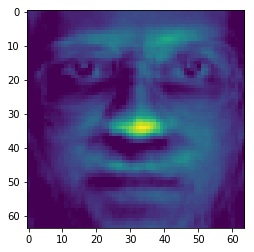

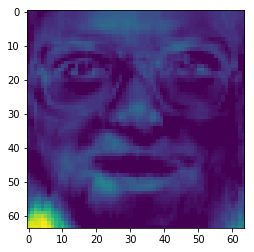

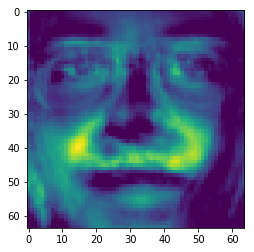

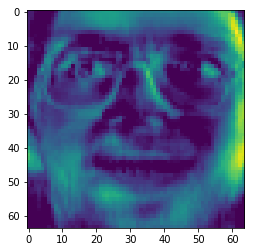

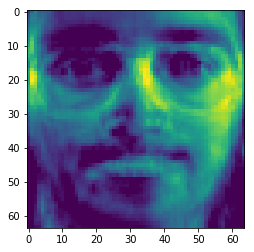

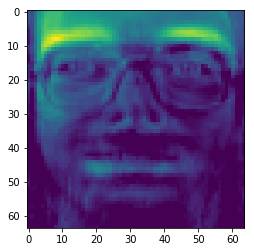

In [72]:
for i in range(0, rank):
    imgplot = plt.imshow(H[i,:].reshape((64,64), order='F'))
    plt.show()

In [73]:
H[:,100]

array([1.01780786, 1.81782439, 0.        , 6.67132603, 0.95473829,
       3.86717313, 0.93987672, 7.39871005, 1.6860676 , 5.39221162,
       0.10278219, 4.33759506, 0.20577655, 4.72838561, 0.2493995 ,
       0.74162752, 1.42789391, 2.06019358, 2.07803093, 0.        ])

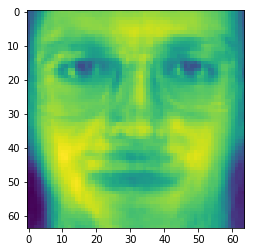

In [74]:
imgplot = plt.imshow(Wtrain[2,:].dot(H).reshape((64,64), order='F'))
plt.show()

In [92]:
model = NMF(n_components=24, init='random', random_state=0)
Wtrain = model.fit_transform(Xtrain)
Wtest=model.transform(Xtest)

mlp = MLPClassifier()
mlp.fit(Wtrain,ytrain)
predictions = mlp.predict(Wtest)
print(classification_report(ytest,predictions))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         3
          3       1.00      0.67      0.80         3
          4       1.00      1.00      1.00         3
          5       0.75      1.00      0.86         3
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         3
         11       0.75      1.00      0.86         3
         12       1.00      0.67      0.80         3
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
         15       1.00      0.67      0.80         3
         16       1.00      1.00      1.00         3
         17       1.00      0.67      0.80   

C:\Users\april\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
